In [1]:
import numpy as np
import os
import xarray as xr

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mapper_functions import plot_global
from mapper_functions import plot_na

In [4]:
from my_functions import read_obsfcstana

In [5]:
path = '/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150409_0600'

#path = '/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2/DAv7_M36_ASCAT_type_2/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
#file_name_start = 'DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150401_0600'

printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

In [6]:
print('obs_species = ', obs_species)

obs_species =  [1. 2. 2. ... 6. 6. 6.]


 Saving figure as SMAP & ASCAT observations, 20150401_0300Z.png 



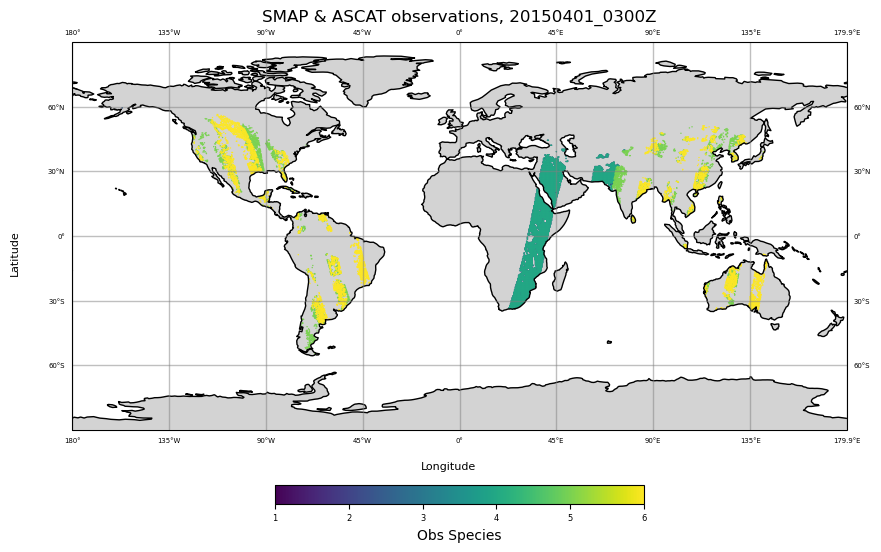

In [10]:
    numobs = len(obs_species)
    obarray = np.empty([numobs, 3])
    obarray[:, 1] = obs_lon
    obarray[:, 2] = obs_lat
    obarray[:, 0] = obs_species
    
    plot_global(obarray,True,'SMAP & ASCAT observations, 20150409_0600Z','Obs Species')

Number of SMAP obs: 11500
Number of unique SMAP tiles: 5768
Number of ASCAT obs: 10158
Number of unique ASCAT tiles: 7905
 Saving figure as SMAP observations, 20150401_0300Z.png 



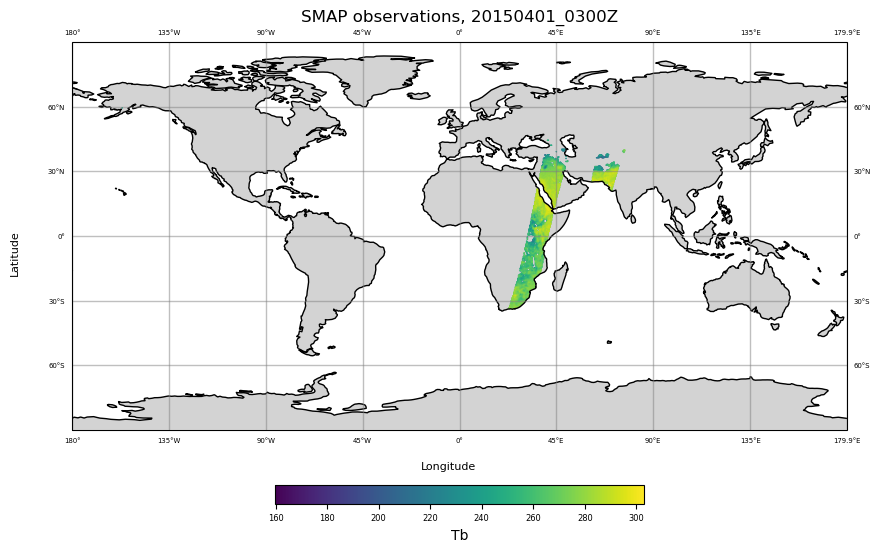

In [11]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

numobs = len(obs_tilenum[smap_obs])
print("Number of SMAP obs:", numobs)

unique_values = np.unique(obs_tilenum[smap_obs])
num_unique_values = len(unique_values)
print("Number of unique SMAP tiles:", num_unique_values)

numobs = len(obs_tilenum[ascat_obs])
print("Number of ASCAT obs:", numobs)

unique_values = np.unique(obs_tilenum[ascat_obs])
num_unique_values = len(unique_values)
print("Number of unique ASCAT tiles:", num_unique_values)

numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_obs[smap_obs]

plot_global(obarray,True,'SMAP observations, 20150409_0600Z','Tb')

 Saving figure as ASCAT observations, 20150401_0300Z.png 



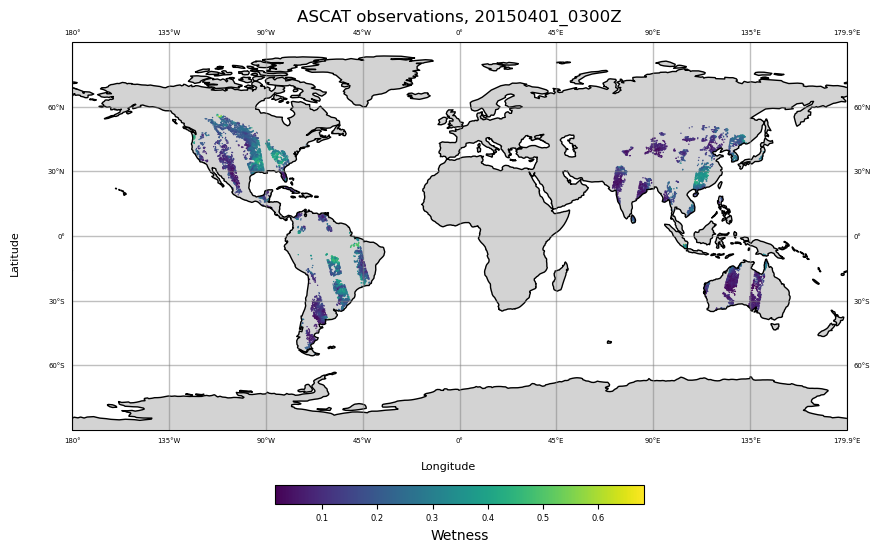

In [12]:
numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

obs_gt_zero = obs_obs
test = obs_obs<0
obs_gt_zero[test] = 0.0

obarray[:, 0] = obs_gt_zero[ascat_obs]

plot_global(obarray,True,'ASCAT observations, 20150409_0600Z','Wetness')

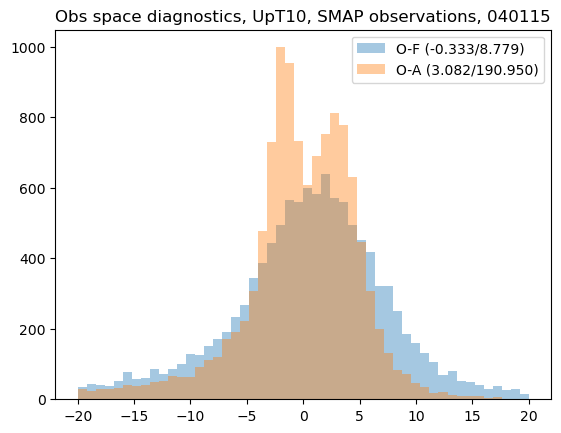

In [13]:
#test = obs_ana<-1000
#obs_ana[test] = 250.0

omf = (obs_obs - obs_fcst)
oma = (obs_obs - obs_ana)

bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[smap_obs]), np.std(omf[smap_obs])))
n2, bins, patches = plt.hist(oma[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[smap_obs]), np.std(oma[smap_obs])))

plt.title('Obs space diagnostics, UpT10, SMAP observations, 040115')

plt.legend()

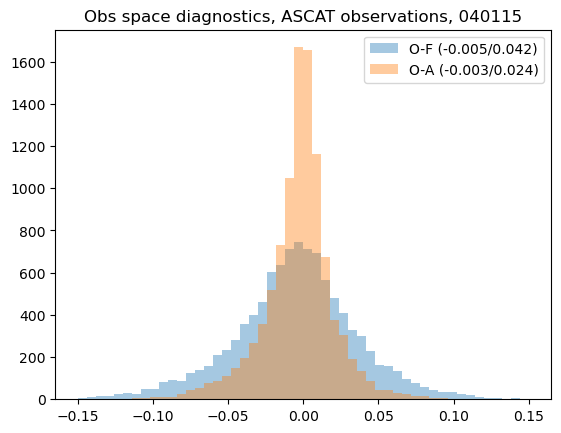

In [14]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[ascat_obs]), np.std(omf[ascat_obs])))
n2, bins, patches = plt.hist(oma[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[ascat_obs]), np.std(oma[ascat_obs])))

plt.title('Obs space diagnostics, ASCAT observations, 040115')

plt.legend()

[-0.00378445 -0.00130284 -0.00029185 ...  0.0029946  -0.00239024
 -0.00242504]
-0.0025286070674622615


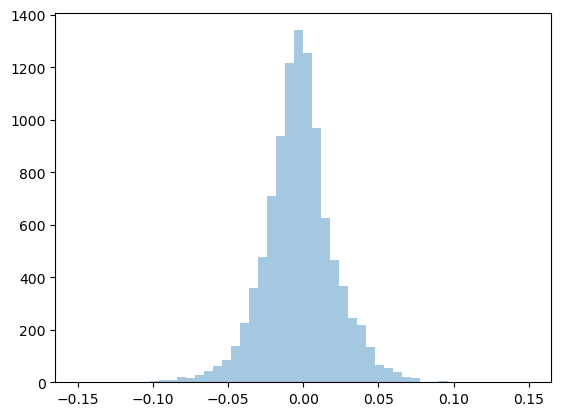

In [15]:
incr = obs_ana - obs_fcst

# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(incr[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='Incr ({:.3f}/{:.3f})'.format(np.mean(incr[ascat_obs]), np.std(incr[ascat_obs])))

# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
#n1, bins, patches = plt.hist(incr[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='Incr ({:.3f}/{:.3f})'.format(np.mean(incr[smap_obs]), np.std(incr[smap_obs])))

print (incr[ascat_obs])
print (np.mean(incr[ascat_obs]))

 Saving figure as SRFEXC increment, SMAP & ASCAT, 20150401_0300Z.png 



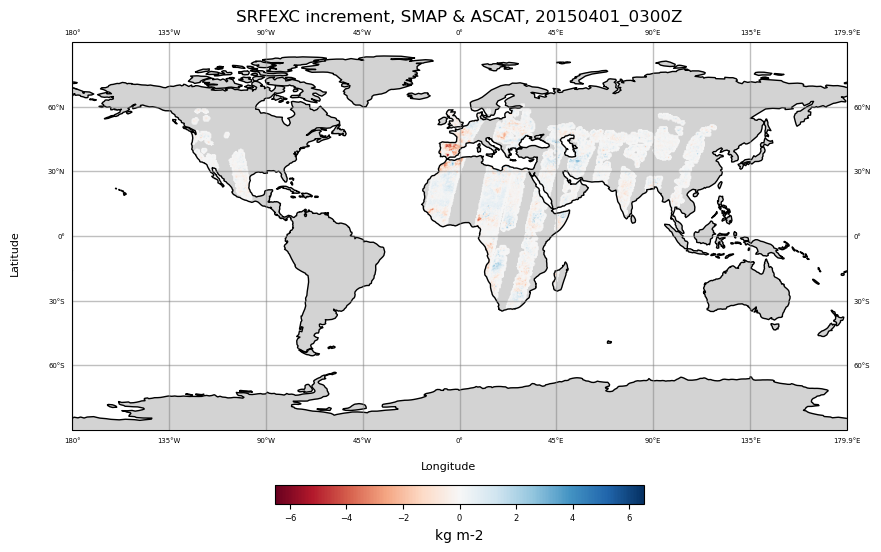

In [16]:
# Open the netcdf file
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/smap_ascat_multivariate_test.catch_progn_incr.20150409.nc4')

# Read lat and lon
lon = ds['lon'].values
lat = ds['lat'].values

# Read SRFEXC_INCR
srfexc_incr_sa = ds['SRFEXC_INCR'].values[2]

# set any values between -0.0005 and 0.0005 to nan
srfexc_incr_sa[np.logical_and(srfexc_incr_sa > -0.00002, srfexc_incr_sa < 0.00002)] = np.nan

# Make obarray
obarray = np.zeros((len(lon), 3))
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = srfexc_incr_sa.flatten()

# Plot the srcexc_incr values
plot_global(obarray,True,'SRFEXC increment, SMAP & ASCAT, 20150409_0600Z','kg m-2')

 Saving figure as SRFEXC increment, ASCAT only, 20150401_0300Z.png 



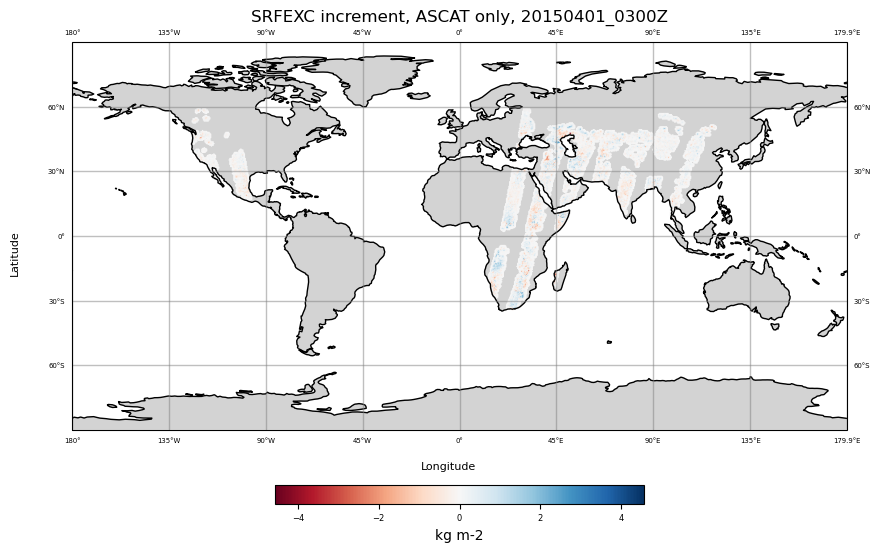

In [17]:
# Open the netcdf file
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2/DAv7_M36_ASCAT_type_2/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/DAv7_M36_ASCAT_type_2.catch_progn_incr.20150409.nc4')

# Read lat and lon
lon = ds['lon'].values
lat = ds['lat'].values

# Read SRFEXC_INCR
srfexc_incr_a = ds['SRFEXC_INCR'].values[2]

# set any values between -0.0005 and 0.0005 to nan
srfexc_incr_a[np.logical_and(srfexc_incr_a > -0.00002, srfexc_incr_a < 0.00002)] = np.nan

# Make obarray
obarray = np.zeros((len(lon), 3))
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = srfexc_incr_a.flatten()

# Plot the srcexc_incr values
plot_global(obarray,True,'SRFEXC increment, ASCAT only, 20150409_0600Z','kg m-2')

 Saving figure as SRFEXC increment, SMAP only, 20150401_0300Z.png 



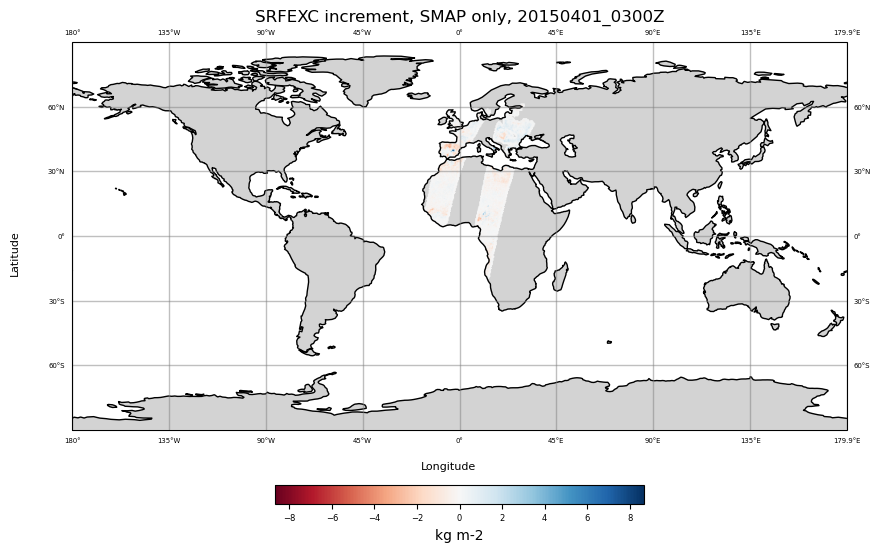

In [18]:
# Open the netcdf file
ds = xr.open_dataset('/home/amfox/smap/SMAP_Nature/SMAP_Nature_v10/DAv7_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/DAv7_M36.catch_progn_incr.20150409.nc4')

# Read lat and lon
lon = ds['lon'].values
lat = ds['lat'].values

# Read SRFEXC_INCR
srfexc_incr_s = ds['SRFEXC_INCR'].values[2]

# set any values between -0.0005 and 0.0005 to nan
srfexc_incr_s[np.logical_and(srfexc_incr_s > -0.00002, srfexc_incr_s < 0.00002)] = np.nan

# Make obarray
obarray = np.zeros((len(lon), 3))
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = srfexc_incr_s.flatten()

# Plot the srcexc_incr values
plot_global(obarray,True,'SRFEXC increment, SMAP only, 20150409_0600Z','kg m-2')

 Saving figure as SRFEXC increment, Combined - SMAP only, 20150103_0600Z.png 



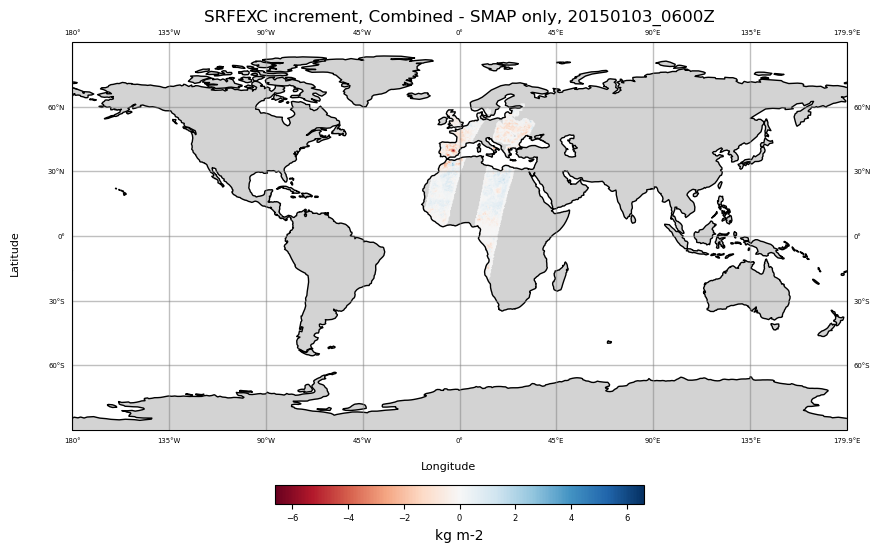

In [19]:
obarray[:, 0] = srfexc_incr_sa.flatten() - srfexc_incr_s.flatten()

# Plot the srcexc_incr values
plot_global(obarray,True,'SRFEXC increment, Combined - SMAP only, 20150409_0600Z','kg m-2')

 Saving figure as SRFEXC increment, Combined - ASCAT only, 20150103_0600Z.png 



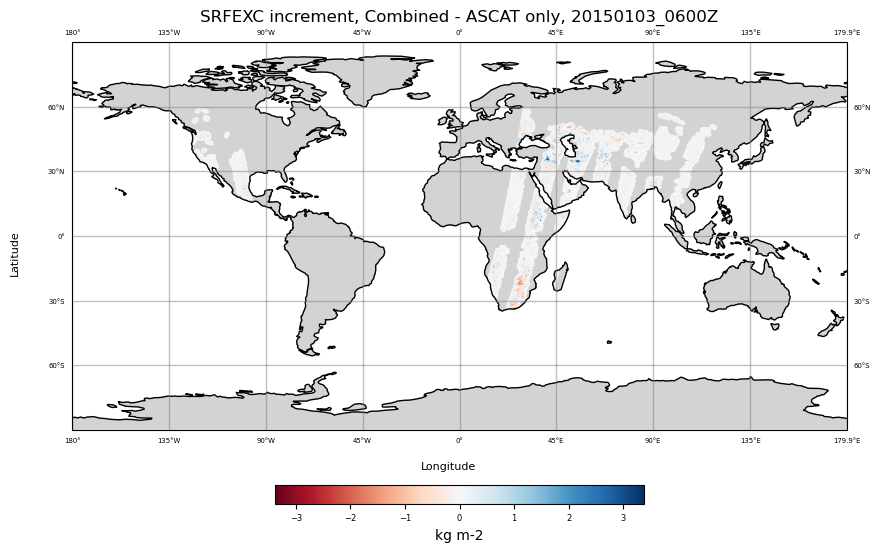

In [20]:
obarray[:, 0] = srfexc_incr_sa.flatten() - srfexc_incr_a.flatten()

# Plot the srcexc_incr values
plot_global(obarray,True,'SRFEXC increment, Combined - ASCAT only, 20150409_0600Z','kg m-2')

In [12]:
path = '/discover/nobackup/amfox/Experiments/UpT02_da_1_day/UpT02_da/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'UpT02_da.ens_avg.ldas_ObsFcstAna.20150401'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  155441


Number of SMAP obs: 86416
Number of unique SMAP tiles: 36827
Number of ASCAT obs: 69025
Number of unique ASCAT tiles: 28160


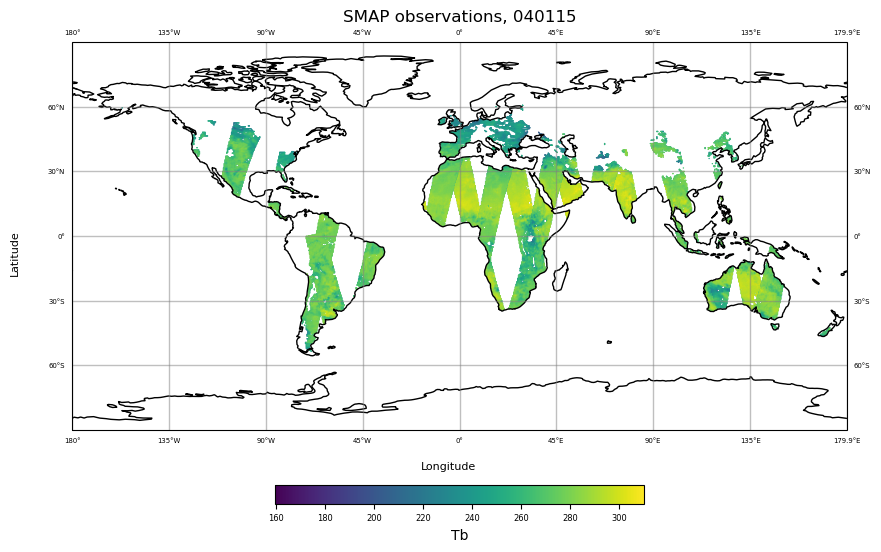

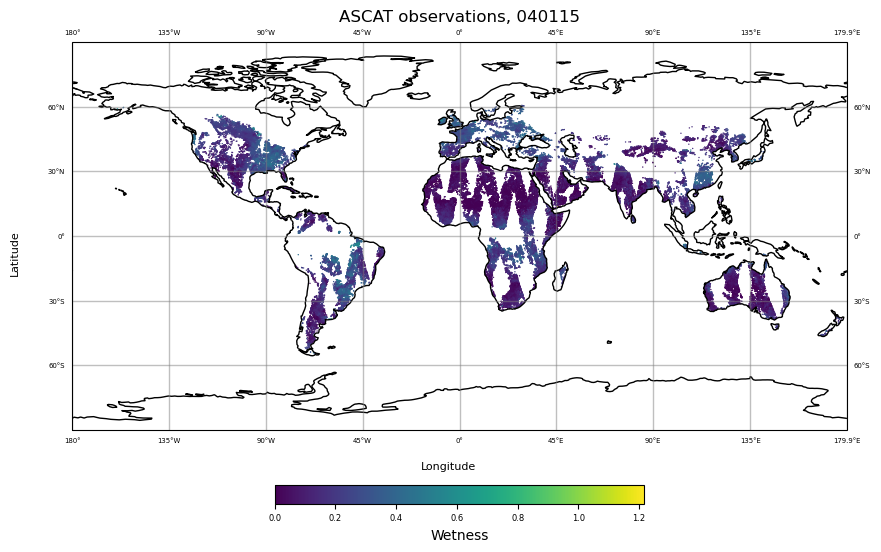

In [13]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

numobs = len(obs_tilenum[smap_obs])
print("Number of SMAP obs:", numobs)

unique_values = np.unique(obs_tilenum[smap_obs])
num_unique_values = len(unique_values)
print("Number of unique SMAP tiles:", num_unique_values)

numobs = len(obs_tilenum[ascat_obs])
print("Number of ASCAT obs:", numobs)

unique_values = np.unique(obs_tilenum[ascat_obs])
num_unique_values = len(unique_values)
print("Number of unique ASCAT tiles:", num_unique_values)

numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_obs[smap_obs]

plot_global(obarray,False,'SMAP observations, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

obs_gt_zero = obs_obs
test = obs_obs<0
obs_gt_zero[test] = 0.0

obarray[:, 0] = obs_gt_zero[ascat_obs]

plot_global(obarray,False,'ASCAT observations, 040115','Wetness')

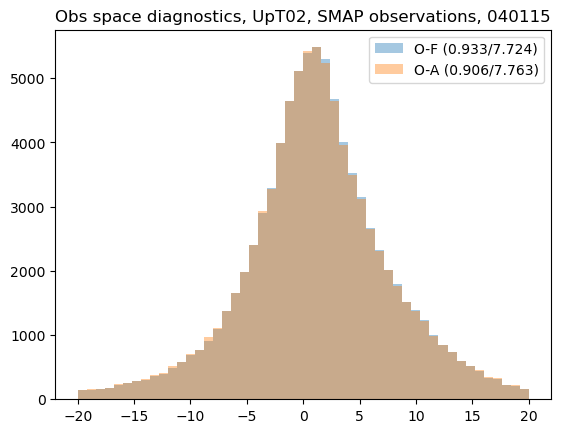

In [14]:
test = obs_ana<-1000
obs_ana[test] = 250.0

omf = (obs_obs - obs_fcst)
oma = (obs_obs - obs_ana)

bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[smap_obs]), np.std(omf[smap_obs])))
n2, bins, patches = plt.hist(oma[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[smap_obs]), np.std(oma[smap_obs])))

plt.title('Obs space diagnostics, UpT02, SMAP observations, 040115')

plt.legend()

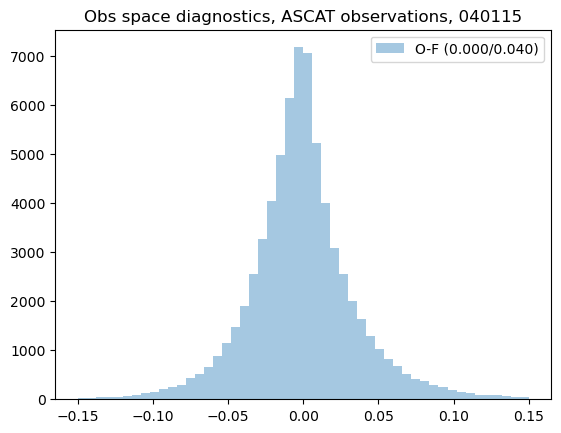

In [15]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[ascat_obs]), np.std(omf[ascat_obs])))
#n2, bins, patches = plt.hist(oma[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[ascat_obs]), np.std(oma[ascat_obs])))

plt.title('Obs space diagnostics, ASCAT observations, 040115')

plt.legend()

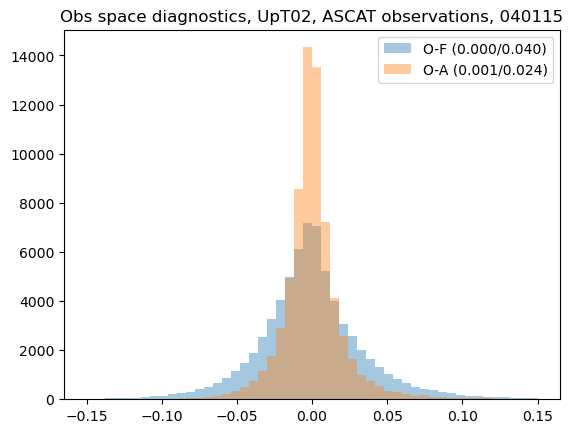

In [16]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[ascat_obs]), np.std(omf[ascat_obs])))
n2, bins, patches = plt.hist(oma[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[ascat_obs]), np.std(oma[ascat_obs])))

plt.title('Obs space diagnostics, UpT02, ASCAT observations, 040115')

plt.legend()

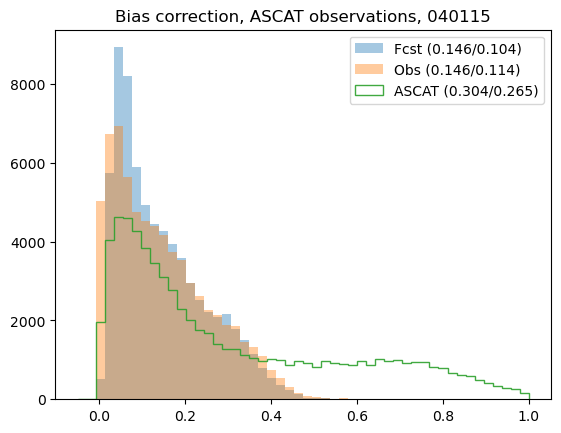

In [17]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.05, 1.0, 51)
n2, bins, patches = plt.hist(obs_fcst[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='Fcst ({:.3f}/{:.3f})'.format(np.mean(obs_fcst[ascat_obs]), np.std(obs_fcst[ascat_obs])))
n1, bins, patches = plt.hist(obs_obs[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='Obs ({:.3f}/{:.3f})'.format(np.mean(obs_obs[ascat_obs]), np.std(obs_obs[ascat_obs])))
n3, bins, patches = plt.hist(obs_obs_no_scaling[ascat_obs_no_scaling], density=False, bins=bin_edges, alpha=0.9, label='ASCAT ({:.3f}/{:.3f})'.format(np.mean(obs_obs_no_scaling[ascat_obs_no_scaling]), np.std(obs_obs_no_scaling[ascat_obs_no_scaling])), histtype='step')



plt.title('Bias correction, ASCAT observations, 040115')

plt.legend()

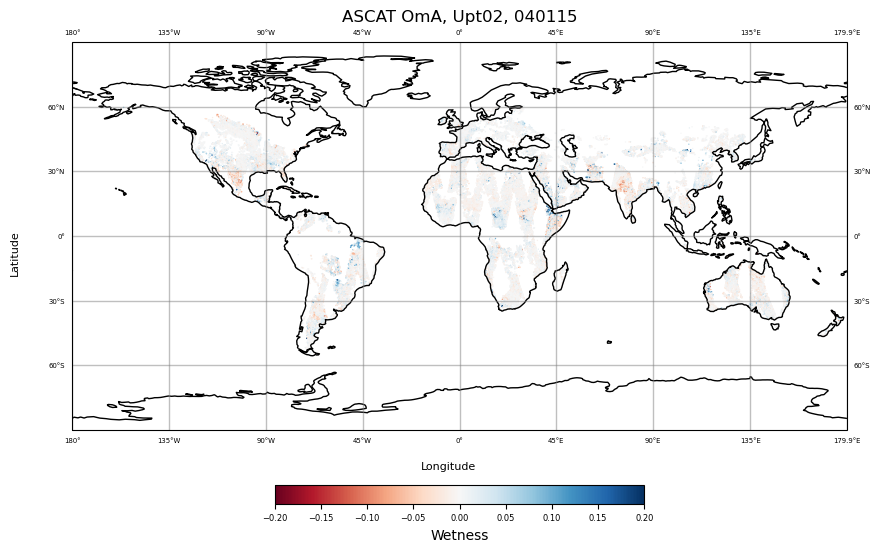

In [18]:
numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
oma_a = oma[ascat_obs]
test = oma_a>0.2
oma_a[test] = 0.2
test = oma_a<-0.2
oma_a[test] = -0.2

obarray[:, 0] = oma_a

plot_global(obarray,False,'ASCAT OmA, Upt02, 040115','Wetness')


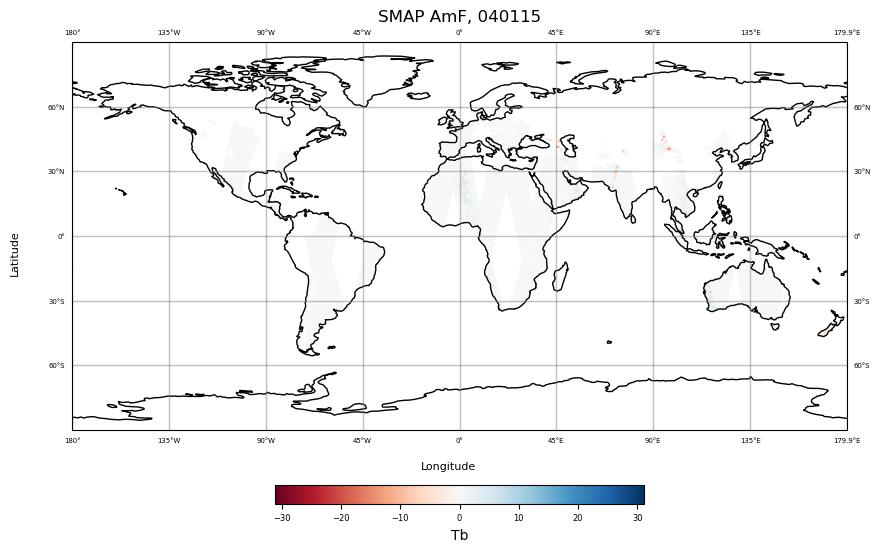

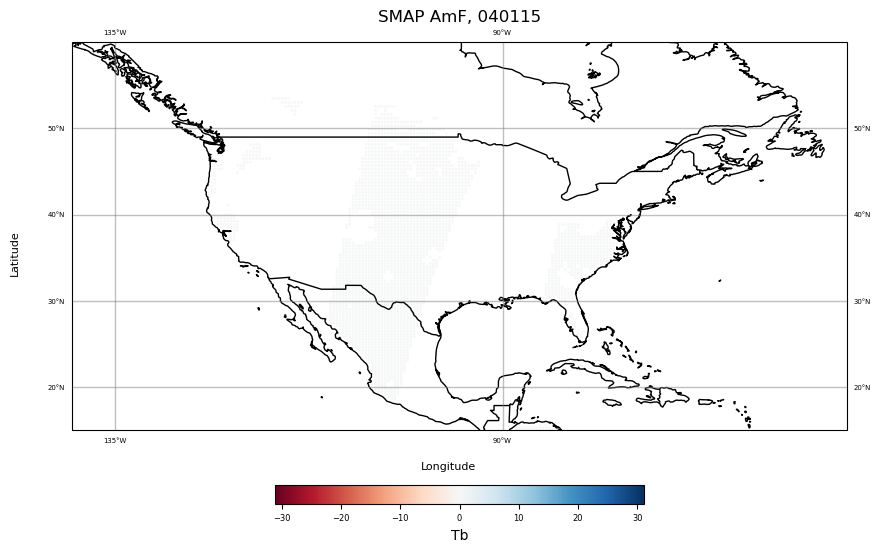

In [19]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_ana[smap_obs] - obs_fcst[smap_obs]

plot_global(obarray,False,'SMAP AmF, 040115','Tb')
plot_na(obarray,False,'SMAP AmF, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
obarray[:, 0] = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

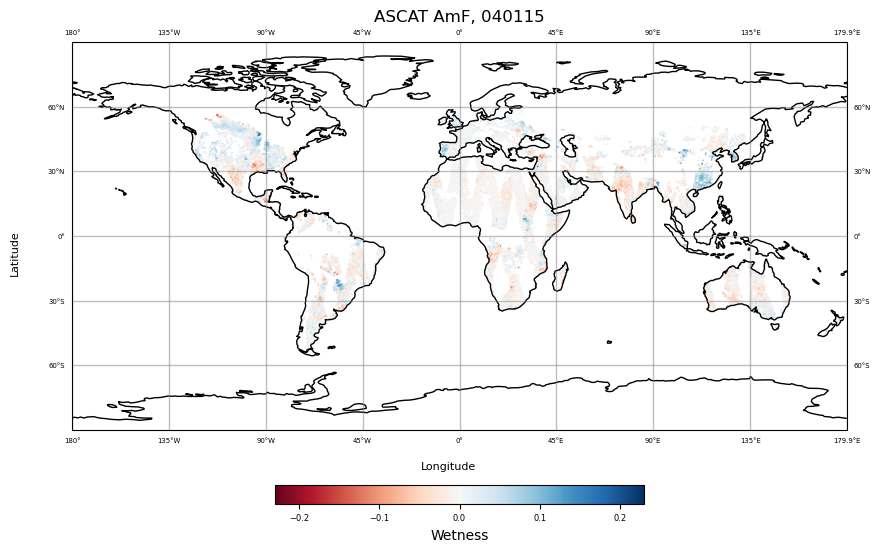

In [20]:
plot_global(obarray,False,'ASCAT AmF, 040115','Wetness')

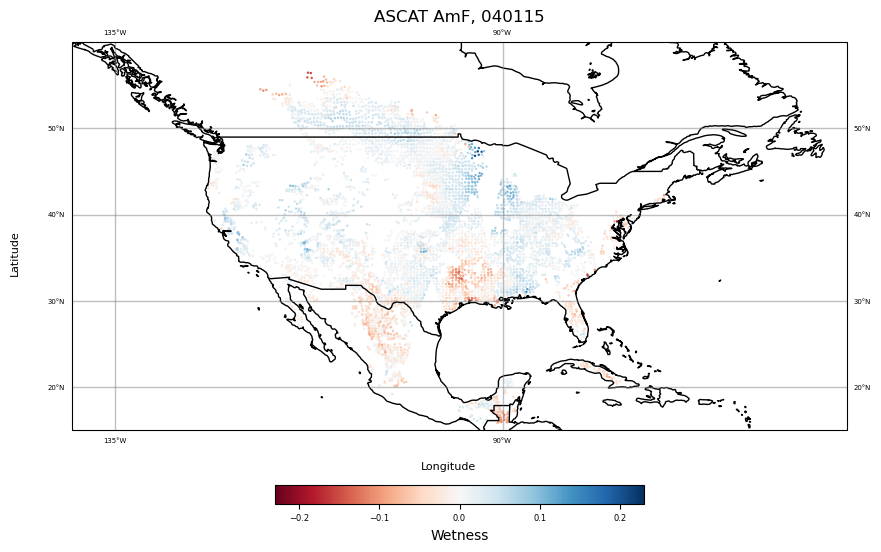

In [21]:
plot_na(obarray,False,'ASCAT AmF, 040115','Wetness')

UpT02_amf_smap = obs_ana[smap_obs] - obs_fcst[smap_obs]
UpT02_amf_ascat = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

In [22]:
path = '/discover/nobackup/amfox/Experiments/UpT13_multivar_test/UpT13_multivar_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'UpT13_multivar_test.ens_avg.ldas_ObsFcstAna.20150401'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  157733


Number of SMAP obs: 87624
Number of unique SMAP tiles: 37372
Number of ASCAT obs: 70109
Number of unique ASCAT tiles: 28620


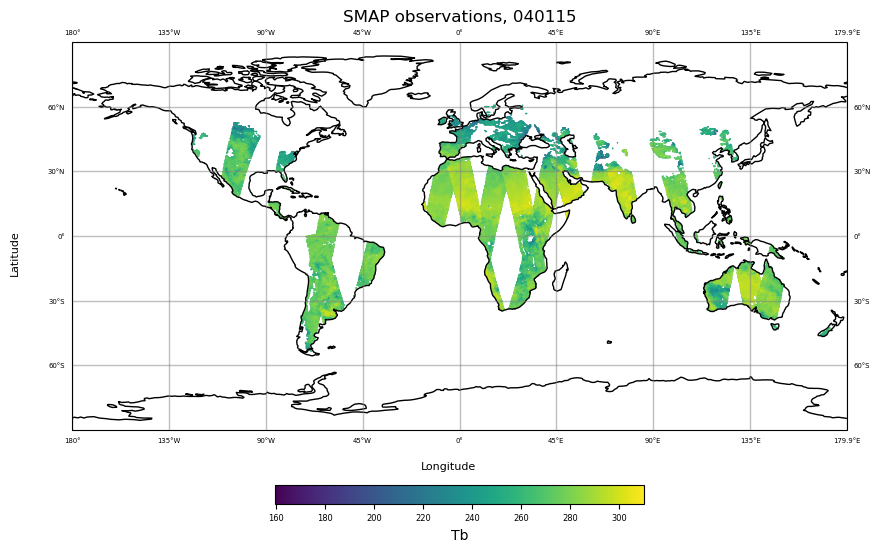

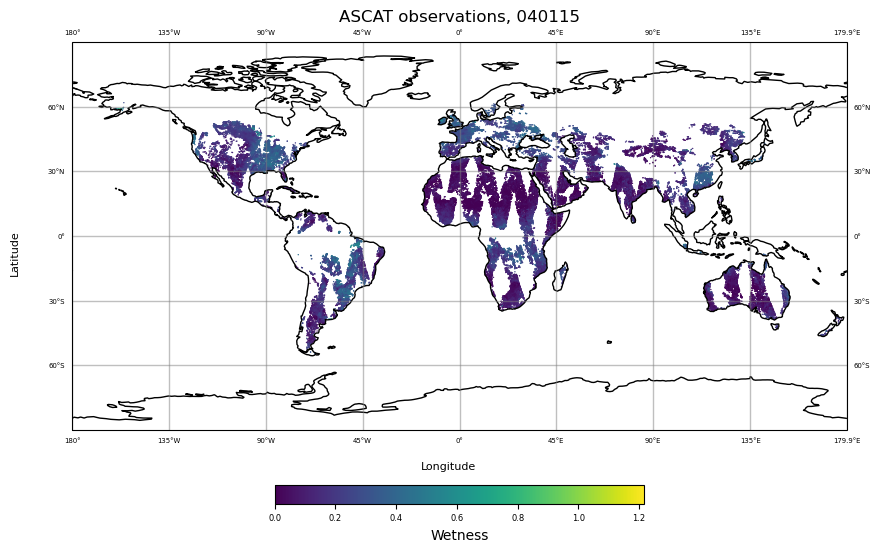

In [23]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

numobs = len(obs_tilenum[smap_obs])
print("Number of SMAP obs:", numobs)

unique_values = np.unique(obs_tilenum[smap_obs])
num_unique_values = len(unique_values)
print("Number of unique SMAP tiles:", num_unique_values)

numobs = len(obs_tilenum[ascat_obs])
print("Number of ASCAT obs:", numobs)

unique_values = np.unique(obs_tilenum[ascat_obs])
num_unique_values = len(unique_values)
print("Number of unique ASCAT tiles:", num_unique_values)

numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_obs[smap_obs]

plot_global(obarray,False,'SMAP observations, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

obs_gt_zero = obs_obs
test = obs_obs<0
obs_gt_zero[test] = 0.0

obarray[:, 0] = obs_gt_zero[ascat_obs]

plot_global(obarray,False,'ASCAT observations, 040115','Wetness')

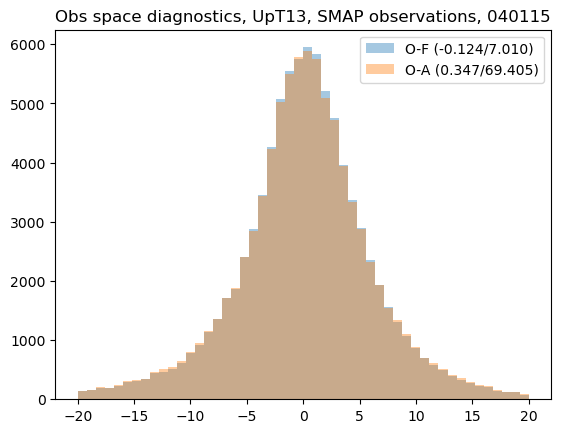

In [24]:
#test = obs_ana<-1000
#obs_ana[test] = 250.0

omf = (obs_obs - obs_fcst)
oma = (obs_obs - obs_ana)

bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[smap_obs]), np.std(omf[smap_obs])))
n2, bins, patches = plt.hist(oma[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[smap_obs]), np.std(oma[smap_obs])))

plt.title('Obs space diagnostics, UpT13, SMAP observations, 040115')

plt.legend()

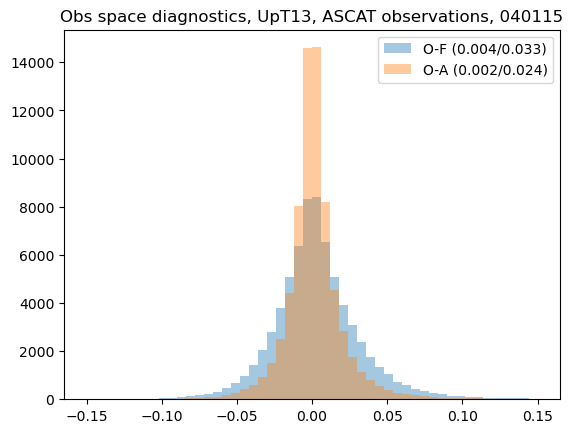

In [25]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[ascat_obs]), np.std(omf[ascat_obs])))
n2, bins, patches = plt.hist(oma[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[ascat_obs]), np.std(oma[ascat_obs])))

plt.title('Obs space diagnostics, UpT13, ASCAT observations, 040115')

plt.legend()

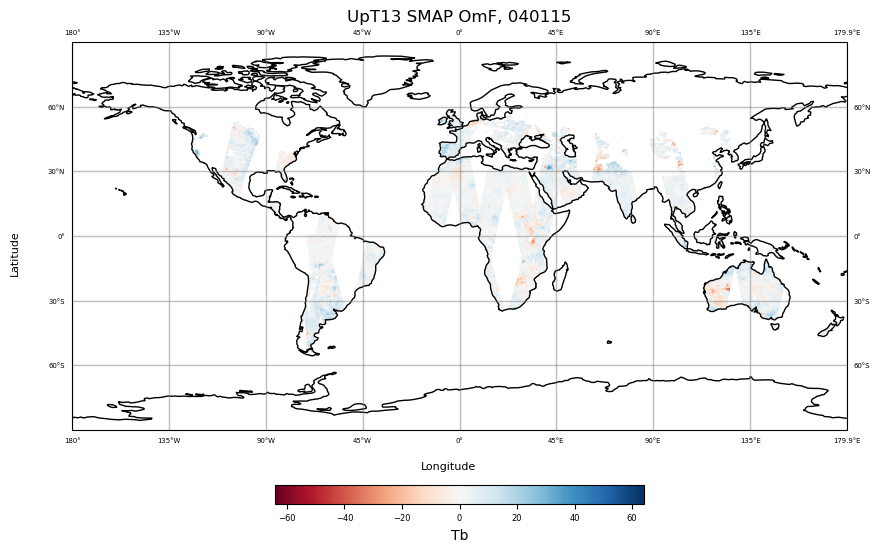

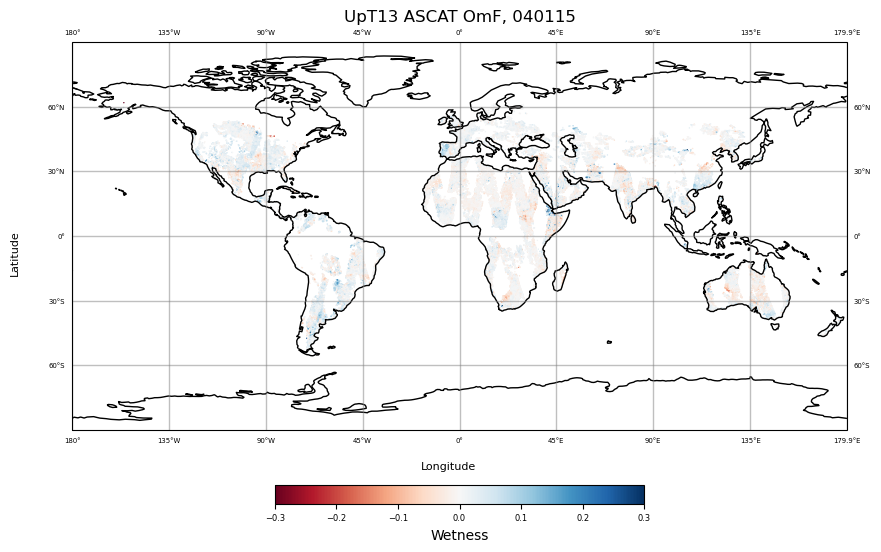

In [26]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = omf[smap_obs]

plot_global(obarray,False,'UpT13 SMAP OmF, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

omf_a = omf[ascat_obs]
test = omf_a>0.3
omf_a[test] = 0.3
test = omf_a<-0.3
omf_a[test] = -0.3

obarray[:, 0] = omf_a

plot_global(obarray,False,'UpT13 ASCAT OmF, 040115','Wetness')

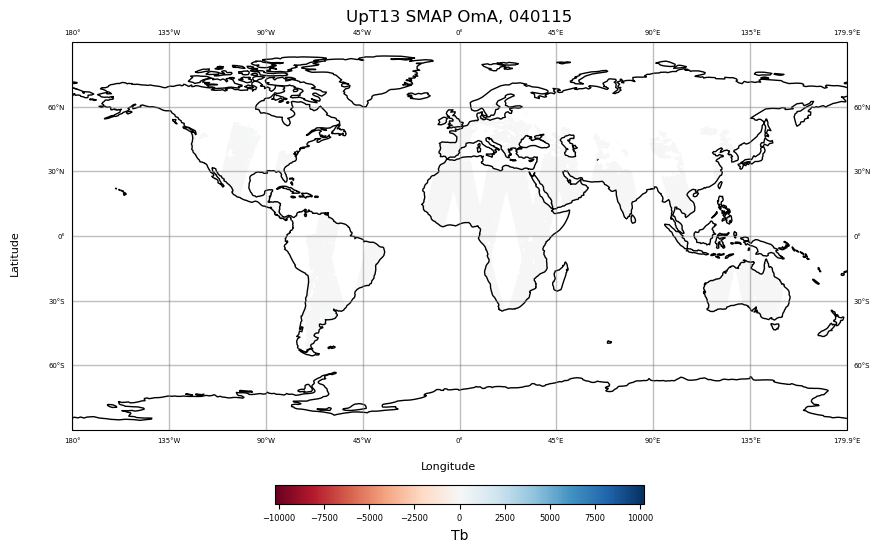

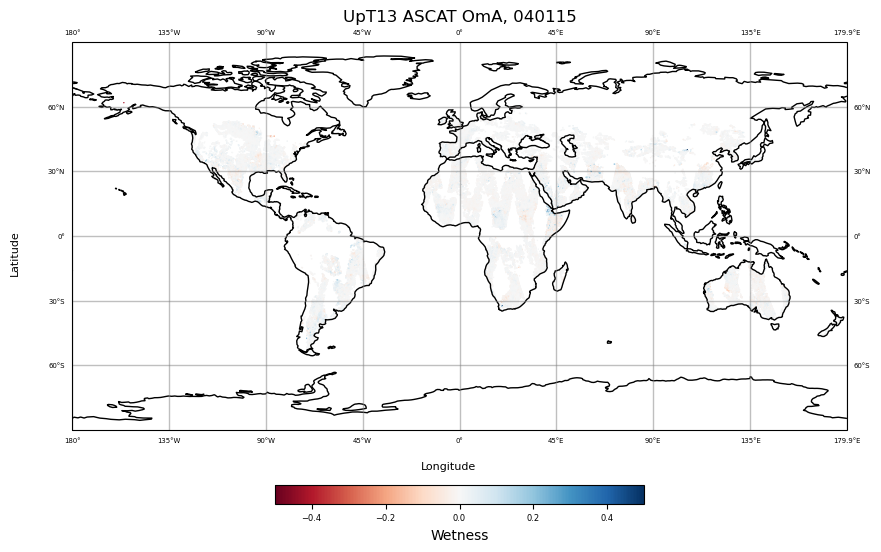

In [27]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = oma[smap_obs]

plot_global(obarray,False,'UpT13 SMAP OmA, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

oma_a = oma[ascat_obs]
test = oma_a>0.5
oma_a[test] = 0.5
test = oma_a<-0.5
oma_a[test] = -0.5

obarray[:, 0] = oma_a

plot_global(obarray,False,'UpT13 ASCAT OmA, 040115','Wetness')

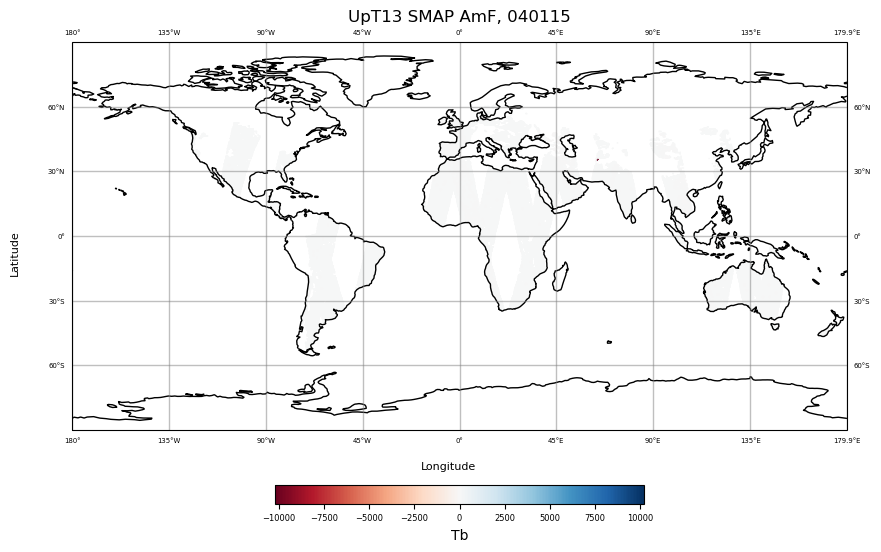

In [28]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_ana[smap_obs] - obs_fcst[smap_obs]

plot_global(obarray,False,'UpT13 SMAP AmF, 040115','Tb')

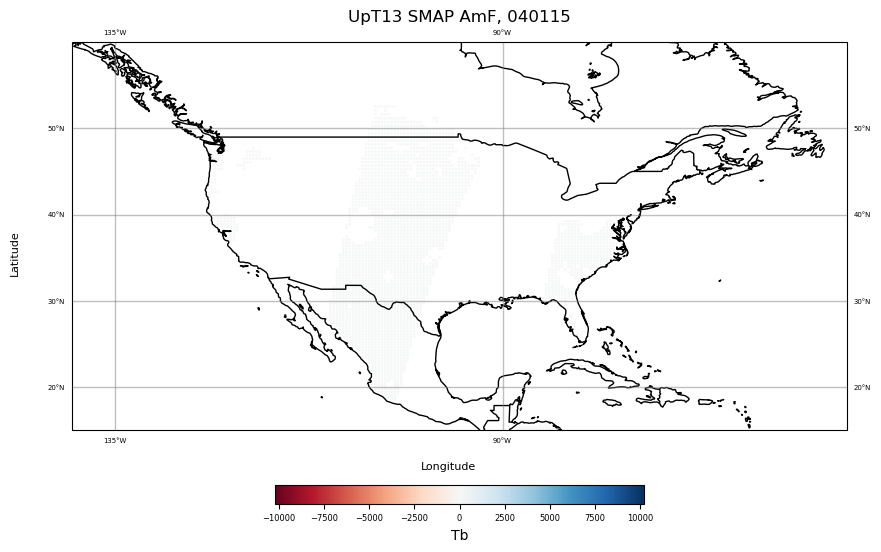

In [29]:
plot_na(obarray,False,'UpT13 SMAP AmF, 040115','Tb')

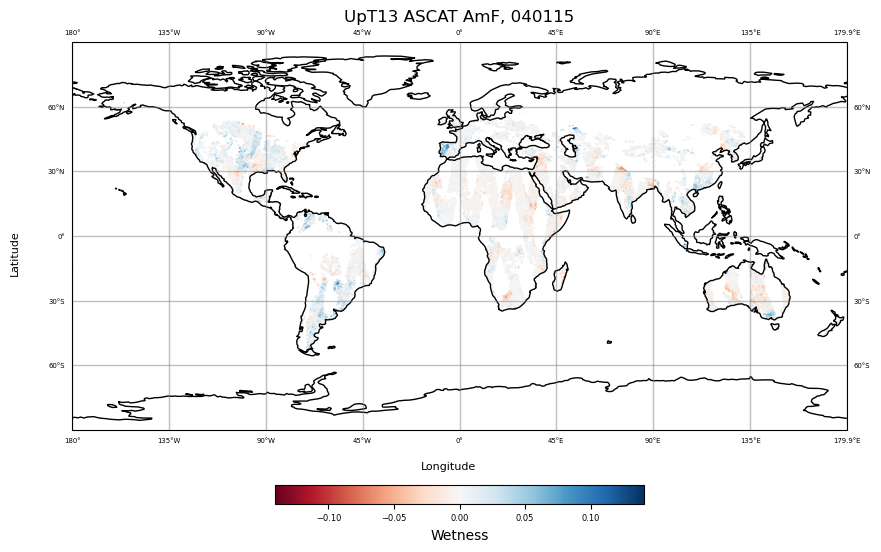

In [30]:
numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
obarray[:, 0] = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

plot_global(obarray,False,'UpT13 ASCAT AmF, 040115','Wetness')

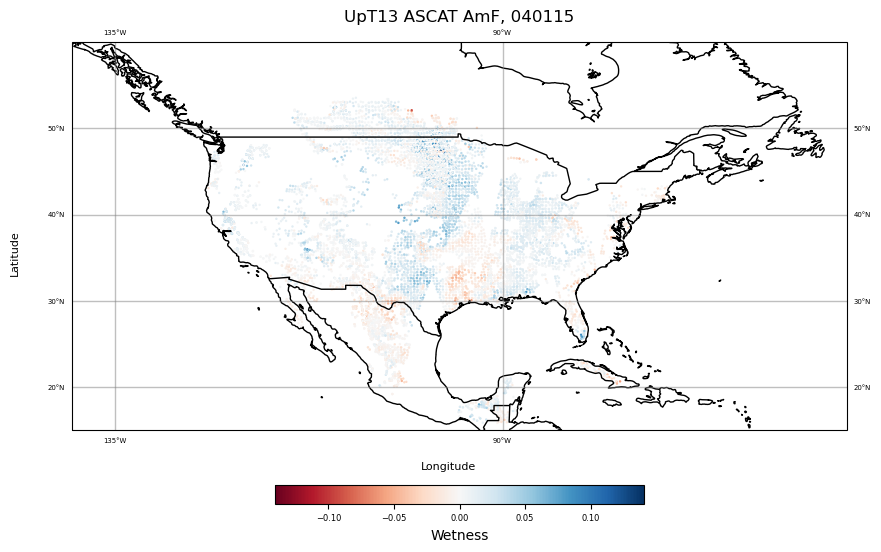

In [31]:
plot_na(obarray,False,'UpT13 ASCAT AmF, 040115','Wetness')

UpT13_amf_smap = obs_ana[smap_obs] - obs_fcst[smap_obs]
UpT13_amf_ascat = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

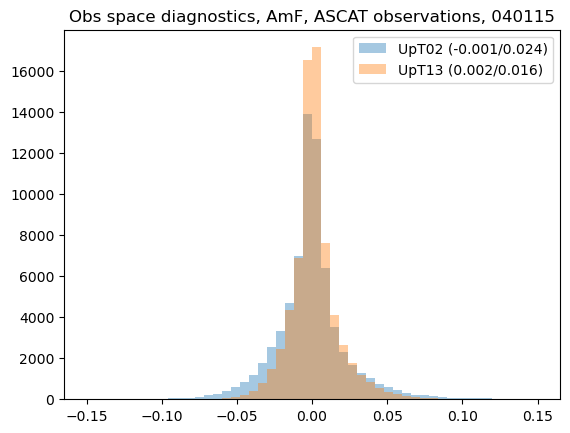

In [32]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(UpT02_amf_ascat, density=False, bins=bin_edges, alpha=0.4,label='UpT02 ({:.3f}/{:.3f})'.format(np.mean(UpT02_amf_ascat), np.std(UpT02_amf_ascat)))
n2, bins, patches = plt.hist(UpT13_amf_ascat, density=False, bins=bin_edges, alpha=0.4,label='UpT13 ({:.3f}/{:.3f})'.format(np.mean(UpT13_amf_ascat), np.std(UpT13_amf_ascat)))

plt.title('Obs space diagnostics, AmF, ASCAT observations, 040115')

plt.legend()

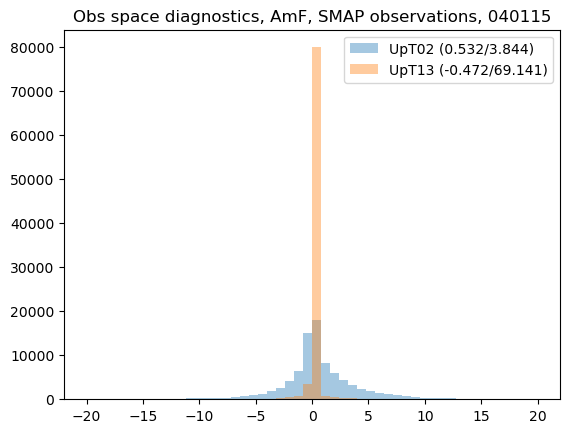

In [33]:
# ASCAT
bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(UpT10_amf_smap, density=False, bins=bin_edges, alpha=0.4,label='UpT02 ({:.3f}/{:.3f})'.format(np.mean(UpT10_amf_smap), np.std(UpT10_amf_smap)))
n2, bins, patches = plt.hist(UpT13_amf_smap, density=False, bins=bin_edges, alpha=0.4,label='UpT13 ({:.3f}/{:.3f})'.format(np.mean(UpT13_amf_smap), np.std(UpT13_amf_smap)))

plt.title('Obs space diagnostics, AmF, SMAP observations, 040115')

plt.legend()